In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [22]:
def plot_2d(data,text=None):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(data[:,0],data[:,1], c='blue', edgecolor='k', s=50, alpha=0.7)
    if text:
        for i in range(len(text)):
            plt.text(data[i,0], data[i,1],text[i].split('/')[-1])
    plt.title('PCA: 2 Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [23]:
def plot_3d(data,text=None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2],  cmap='tab10', s=20)
    plt.colorbar(scatter)
    if text:
        for i in range(len(text)):
            plt.text(data[i,0], data[i,1],text[i].split('/')[-1])
    ax.set_title("3D PCA Visualization of Olivetti Faces Dataset")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    plt.show()

In [24]:
def find_pca(data,n_components=2):
  # Center the data
  data_centered = data - np.mean(data)
  # Find the covariance, since rows are observations and columns are features
  cov_matrix = np.cov(data_centered,rowvar=False)
  # Find the Eigenvectors and Eigenvalues
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  # Sort the eigenvalues
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvectors = eigenvectors[:,sorted_indices]
  sorted_eigenvalues = eigenvalues[sorted_indices]
  #select the top n_components
  top_eigenvectors = sorted_eigenvectors[:,:n_components]
  top_eigenvalues = sorted_eigenvalues[:n_components]
  #Project the data
  final_data = np.dot(data_centered,top_eigenvectors)
  return final_data,top_eigenvectors,top_eigenvalues

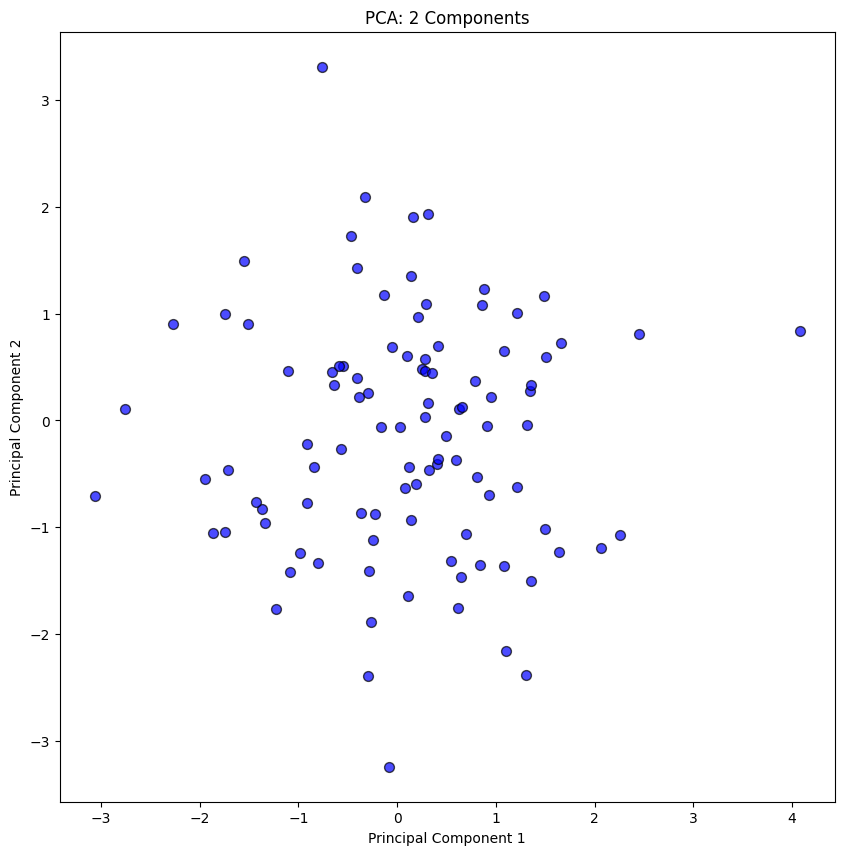

In [27]:
#random data
data = np.random.randn(100,10)
pca_data, eigenvalues,eigenvectors = find_pca(data,2)
plot_2d(pca_data)

C:\Users\MSI\AppData\Local\Temp\ipykernel_1936\2415739537.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2],  cmap='tab10', s=20)


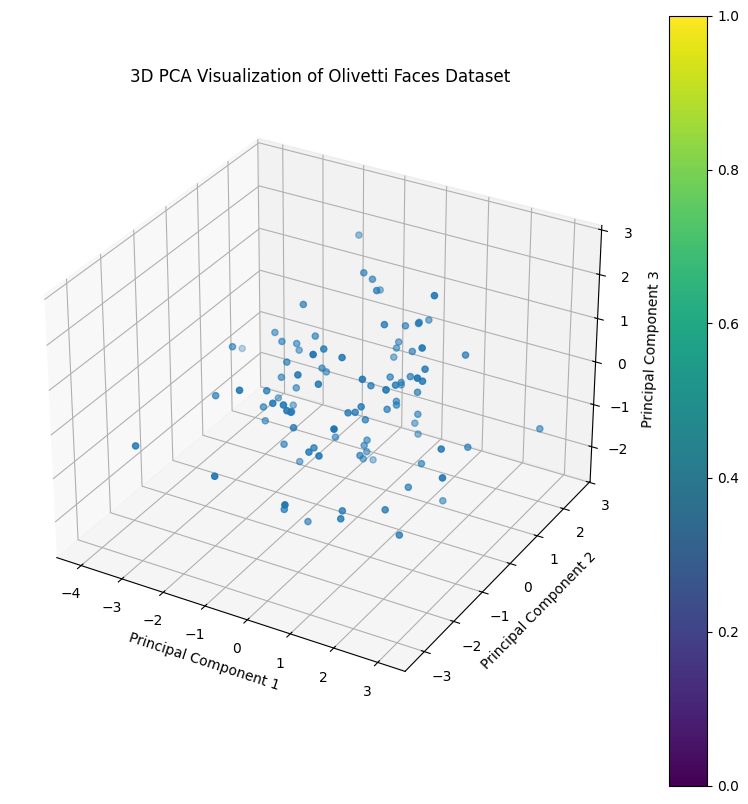

In [29]:
#random data
data = np.random.randn(100,10)
pca_data, eigenvalues,eigenvectors = find_pca(data,3)
plot_3d(pca_data)